In [1]:
import pandas as pd
from ast import literal_eval
df = pd.read_json('/kaggle/input/amazon-reviews/Cell_Phones_and_Accessories_5.json', lines=True, )
df['helpful_0'] = df['helpful'].apply(func=lambda x: x[0])
df['helpful_1'] = df['helpful'].apply(func=lambda x: x[1])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_0,helpful_1
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",0,0
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",0,0
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",0,0
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",4,4
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",2,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
 9   helpful_0       194439 non-null  int64 
 10  helpful_1       194439 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 16.3+ MB


In [3]:
df.drop(columns=['helpful'], ).nunique()

reviewerID         27879
asin               10429
reviewerName       24651
reviewText        194186
overall                5
summary           127885
unixReviewTime      2830
reviewTime          2830
helpful_0            307
helpful_1            320
dtype: int64

In [4]:
from plotly.express import strip
strip(data_frame=df.sample(n=10000).sort_values(by='overall'), x='helpful_0', y='helpful_1', color='overall', log_x=True, log_y=True)

In [5]:
df['asin'].value_counts().head()

asin
B005SUHPO6    837
B0042FV2SI    694
B008OHNZI0    657
B009RXU59C    636
B000S5Q9CA    628
Name: count, dtype: int64

Wow. Some of these items get lots of reviews. Let's look at the top 25 or so and see how they are distributed.

In [6]:
from plotly.express import bar
bar(data_frame=df['asin'].value_counts().to_frame().reset_index().head(n=25), x='asin', y='count')

Are there similarly heavyweight reviewers?

In [7]:
bar(data_frame=df['reviewerID'].value_counts().to_frame().reset_index().head(n=25), x='reviewerID', y='count')

Similar yes, same no.

(-0.5, 1199.5, 1199.5, -0.5)

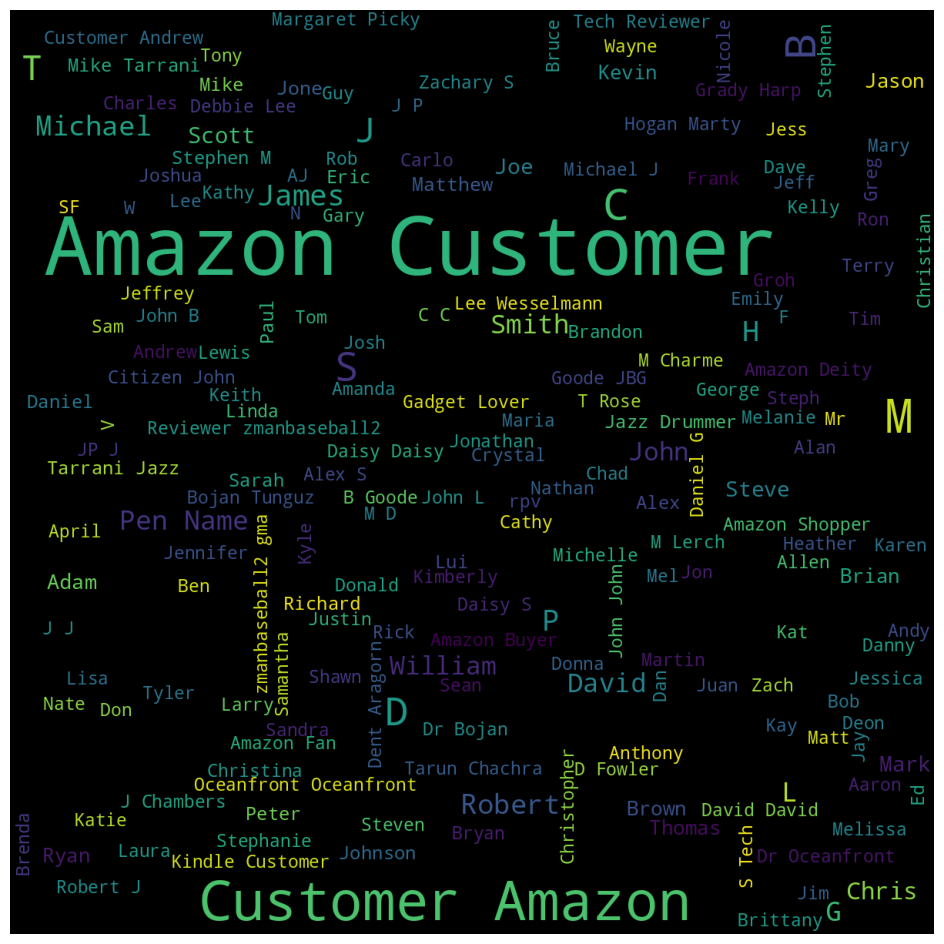

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['reviewerName'].dropna().values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

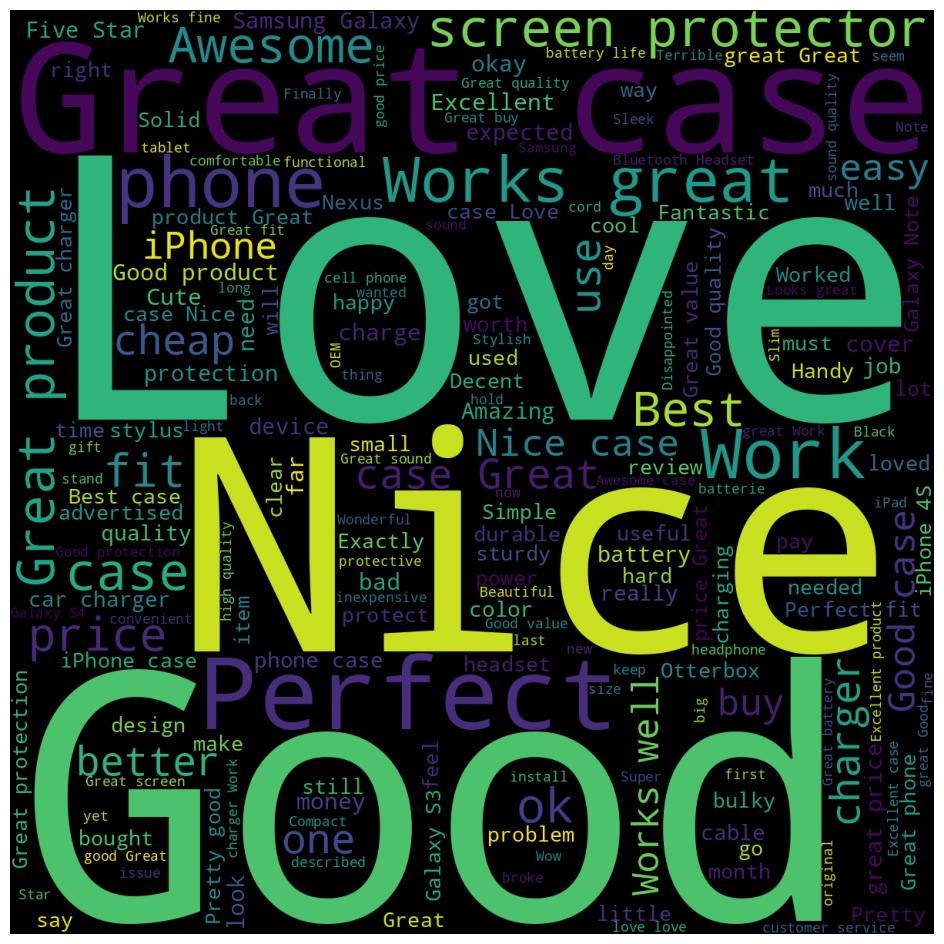

In [9]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['summary'].dropna().values), ))
axis('off')

Wow. The bulk of these reviews have positive summaries.

In [10]:
from plotly.express import histogram
histogram(data_frame=df, x='overall')

In [11]:
df['overall'].value_counts(normalize=True)

overall
5    0.558859
4    0.205684
3    0.110261
1    0.068294
2    0.056902
Name: proportion, dtype: float64

56% of our reviews are five stars, and 76% are four or five stars.

(-0.5, 1199.5, 1199.5, -0.5)

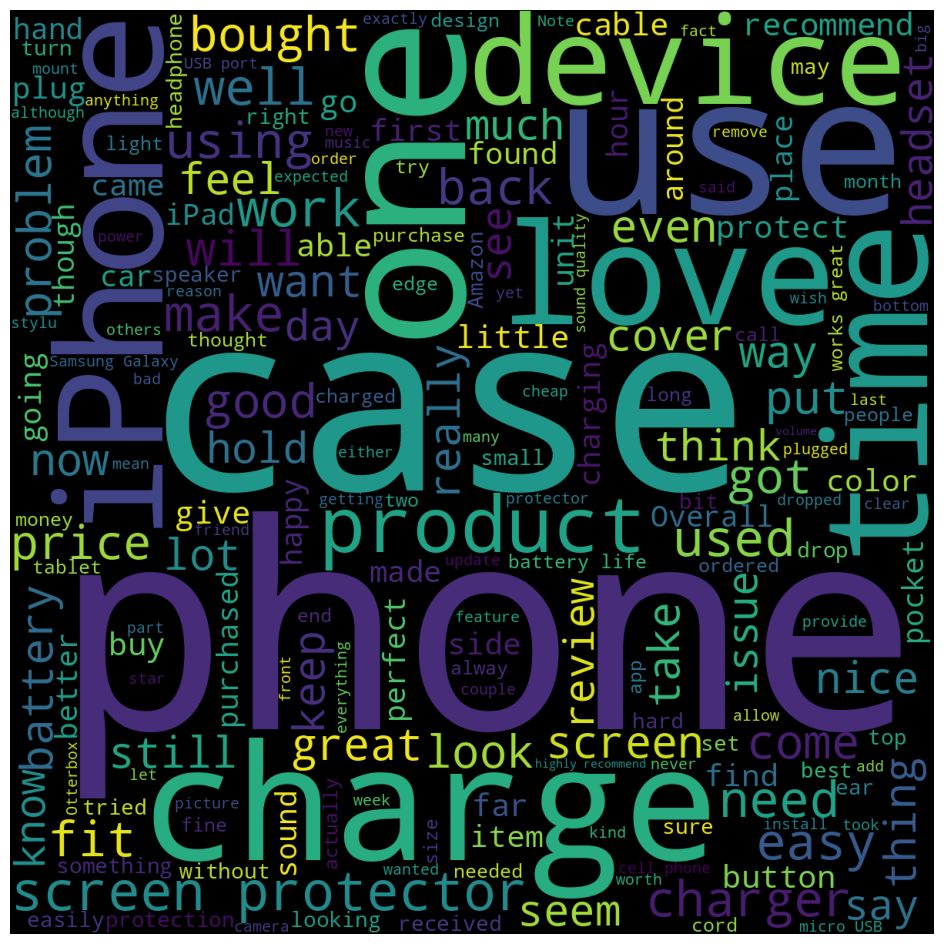

In [12]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['reviewText'].dropna().values), ))
axis('off')

It looks like our dataset is dominated by mobile phone accessories. Amazing.